### Import libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import dataset

In [38]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


This dataset consists of a list of positions in a company along with the band levels and their associated salary. The dataset includes columns for Position with values ranging from Business Analyst, Junior Consultant to CEO, Level ranging from 1-10 and finally the Salary associated with each position ranging from $45000 to $1000000.

In [39]:
df.shape

(10, 3)

### Separate dataset into predictor variables and target variable

In [40]:
X = df[["Level"]]
y = df[["Salary"]] #target variable

### Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)

   Level
4      5
9     10
1      2
6      7
7      8
3      4
0      1
5      6


### Fitting Linear Regression to the dataset

In [42]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions

In [43]:
# Predicting a new result with Linear Regression
y_pred = lin_reg.predict(X_test)

In [71]:
y_pred = lin_reg.predict([[8.5]])
print(y_pred)

[[501873.77690802]]


### Visualising the Linear Regression results

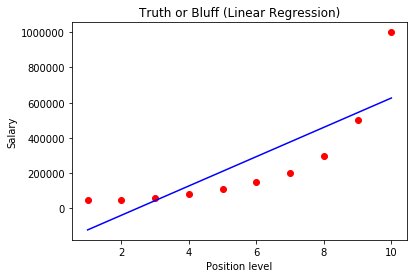

In [26]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict( X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
lin_reg.predict( X)

array([[-122123.28767123],
       [ -38923.67906067],
       [  44275.9295499 ],
       [ 127475.53816047],
       [ 210675.14677104],
       [ 293874.7553816 ],
       [ 377074.36399217],
       [ 460273.97260274],
       [ 543473.58121331],
       [ 626673.18982387]])

### Fitting Polynomial Regression to the dataset

Read more about Polynomial Features here - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree = 4)
X_train_poly = poly_f.fit_transform(X_train)

print(X_train_poly)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

[[1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Polynomial Regression results

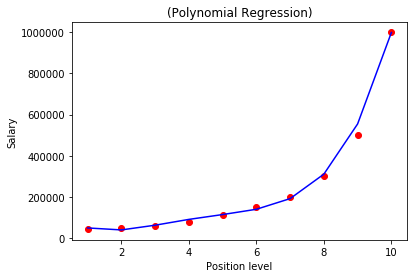

In [29]:
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_reg.predict(poly_f.transform(X)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [30]:
poly_f.transform(X)

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [31]:
# Predicting a new result with Polynomial Regression
poly_reg.predict(poly_f.transform(X_test))

array([[ 62618.48984248],
       [554488.61683452]])

In [66]:
y_pred = poly_reg.predict(poly_f.transform([[8.5]]))
print(y_pred)

[[412630.4296302]]


In [33]:
y_pred = poly_reg.predict(poly_f.transform([[10]]))
print(y_pred)

[[998396.28808559]]


In [74]:
import pickle
pickle.dump(lin_reg, open("salary.pkl","wb"))
